# **🎬 Movie Revenue Predictor**
A full data science pipeline for predicting movie revenue using regression models.

### **`Background`**

`Royal Empire Company` recently announced that the company was planning on launching new subsidiary companies with an aim of diversifying its porfolio. Among the companies to be launched is a production company, `Royal Empire Movie Studio`, which will involve the production and marketing of original and franchise movies. Commissioned by the company, this projects aims to try and predict movie revenues based on several movie factors. The insights will help stakeholders make informed data-driven decisions on the starting and running of the movie studio.

## **Business Understanding**
### Business Overview
The film industry incorporates all of the technological and commercial aspects of filmmaking. This includes production companies, studios, cinematography, distribution, and a lot more. Some of the most important aspects in the industry include;

- Production: This involves the creative process of making films, including screenwriting, pre-production, filming, and post-production.

- Marketing: This involves activities aimed at promoting a movie to attract audiences and maximize revenue. It involves strategies like market research, target audience identification, and leveraging both traditional and digital media.

- Distribution: This covers the methods used to get films to audiences, such as cinemas, television, online platforms, and other media outlets. 

- Monetizing: This involves the various methods used to generate revenue from films. These strategies include traditional avenues like theatrical releases, DVD sales, and television licensing, as well as newer digital approaches such as streaming and online video-on-demand (VOD) platforms.

### Project Overview
Despite the film industry being a multi-billion dollar market, predicting a movie's financial success has remained a challenge. This project aims to predict the **revenue** of a movie using various features such as budget, popularity, vote count, runtime, release month, and genre.

This project also serves as an opportunity to practice Object-Oriented Programming (OOP) in data science workflows, improving modularity, readability, and scalability of the ML pipeline.

### Project Objective
- The primary goal of the project is to assist the company's production teams, investors, and other stakeholders in making data-driven decisions when evaluating new projects by understanding the key drivers of movie revenue and build a robust model for real-world forecasting.

### Stakeholders
- Studio executives: Make key decisions regarding project development, financing, and distribution. 

- Investors: Provide the financial backing for the film. 

### Techniques Used in the Project
The project will be applying the folowing to uncover patterns behind movie performance;
- data preprocessing

- feature engineering

- supervised learning techniques


## **Data Understanding**
### Data Source
To help answer our question, we will be using a dataset generated from The Movie Database (TMDB) API that we downloaded from [kaggle](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata).

Under the file path `Data/RawData/` you can find the raw data files that contain information about several movies with additional information about their crews and cast members. The 2 datasets, namely the `tmdb_500_movies.csv` and the `tmdb_5000_credits.csv` contain features such as movie budgets, revenue, title, genre, popularity, release date, votes, crew, cast among others.

### Why is the data suitable for the project?
The dataset contains rich, diverse data points such as film budget, financial success, genre, popularity, and votes that can be used to train algorithms to predict various outcomes. 

### Initial Analysis
In this section, we are importing all the dependencies/libraries that we will be using in the project, loading the dataset and analyzing it to understand it's structure as well as checking if the quality of the data is good. This is important as without proper data quality tests, businesses risk making decisions based on flawed or incomplete information, which could lead to business failure, etc. 

#### Importing Dependencies
For efficience and accessibility, we will be using; 
- Pandas

- NumPy

- Matplotlib

- Seaborn

- Scikit-Learn 

In the first code, we are importing the libraries named above. 

In [113]:
# Import dependencies.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datetime import datetime
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### Loading the dataset and parsing the dataset.
As mentioned above, we will be using this project as an opportunity to practice our OOP.

In the the first block of code we are building a class that loads the movie datasets into the notebook, merges them so that we only deal with one dataset. This is important as it will make it easy to keep up with the data and all the cleansing will be done all at once, avoiding redundant codes.

The class will also perform qualitatitive and quantitative analysis, helping us understand the structure and contents of the datasets. The analysis will include finding the shape, returning the structure information and statistical summary of the data, it will also check for missing values and duplicated records.

In [114]:
# Create a class that loads data, previews it, and carries out qualitative and quantitative analysis on it.

class MovieDataLoader:
    def __init__(self, movie_path, credits_path):
        self.movie_path = movie_path
        self.credits_path = credits_path
        self.movies_df = None
        self.credits_df = None
        self.merged_df = None

    # Loads the dataset into the notebook using Pandas .read_csv() method.
    def load_data(self): 
        try:
            self.movies_df = pd.read_csv(self.movie_path)
            self.credits_df = pd.read_csv(self.credits_path)
            print("Data loaded successfully.")
        except Exception as e:
            print(f"Error loading files: {e}")

    # Merges the datasets into one using Pandas .merge() method.
    def merge_data(self): 
        if self.movies_df is not None and self.credits_df is not None:
            self.merged_df = pd.merge(self.movies_df, self.credits_df, left_on='id', right_on='movie_id')
            print("Data merged successfully.")
        else:
            print("Load data before merging.")

    # Previews the dataset by returning the first 5 rows. Uses the .head() method.
    def preview_data(self, n=5):
        if self.merged_df is not None:
            return self.merged_df.head(n)
        else:
            print("Data not merged yet.")

    # Retrieves the shape of the dataset using the .shape method.
    def get_shape(self):
        if self.merged_df is not None:
            return self.merged_df.shape
        else:
            return "Data not available yet."
        
    # Returns the dataset's consice summary, helps understand the structure of the data.
    def get_info(self):
        if self.merged_df is not None:
            return self.merged_df.info()
        else:
            return "Load and merge data first."

    # Checks for missing values.
    def check_missing(self):
        if self.merged_df is not None:
            return self.merged_df.isnull().sum()
        else:
            return "Load and merge data first."
        
    # Checks for duplicate records.
    def check_duplicates(self):
        if self.merged_df is not None:
            return self.merged_df.duplicated().sum()
        else:
            return "Load and merge data first."
        
    # Returns the statistical summary of the dataset.    
    def get_stats_summary(self):
        if self.merged_df is not None:
            return self.merged_df.describe()
        else:
            return "Load and merge data first."

In [115]:
# Load the datasets and merge them.
movies_info = MovieDataLoader("../Data/RawData/tmdb_5000_movies.csv", "../Data/RawData/tmdb_5000_credits.csv")

movies_info.load_data()
movies_info.merge_data()

# Preview results.
print(movies_info.get_shape())
movies_info.preview_data()

Data loaded successfully.
Data merged successfully.
(4803, 24)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


The dataset contains structured data stored in 4803 rows and 24 columns. The columns contain values stored as floats, integers and objects. From the preview, we notice that some columns contain nested structures and some contain the same information.

Next we are getting the summarized info on the dataset.

In [116]:
# Get dataset structure info.
movies_info.get_info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

The structure of the dataset is as follows;
- Shape: 4803, 24

- Datatypes: 3 floats, 5 integers and 16 objects

- Null values: homepage, overview, release_date, runtime, and tagline columns contain null values.

- Wrong data-type: release_date is stored as objects instead of datetime. Also, we saw that some columns contain nested structures but are stored as objects.

Next we are going to look at the numer of missing values in the columns and if we have any duplicated records.

In [117]:
# Check missing values and duplicates.
print(movies_info.check_missing())
movies_info.check_duplicates()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
movie_id                   0
title_y                    0
cast                       0
crew                       0
dtype: int64


0

The data has no duplicated records but has missing values in several columns but mostly in 2 columns.

In the next code we are looking at the quantitative summary of the dataset including the numerical data's measures of central tendencies, measures of spread and some aggregate functions.

In [118]:
movies_info.get_stats_summary()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989,57165.484281
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891,88694.614033
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,5.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000,9014.500000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,14629.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000,58610.500000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,459488.000000


Through this summary, we found that we have records in the dataset that contain placeholders. For example, the budget, runtime, and revenue columns `min` is 0, which logically is impossible. The other columns also contain the same, adding to the theory that th number 0 was used as a placeholder.

### Data Quality Issues.
Upon exloring the dataset, we found that the data contains several data quality issues, they include:
- Incomplete records: The data contains columns that have missing values and others that contain placeholders.

- Inaccurate records: There is a column that contains values stored in the wrong data type.

- Irrelevant columns: The dataset has 24 columns, most of which are not relevant to the project, irrelevant columns can negatively impact a prediction model. They can decrease accuracy, and make the model harder to interpret. They also add noise to the data, potentially leading to overfitting.

- Duplicated columns: The dataset has 3 columns that have the same content, namely `original_title`, `title_x`, and `title_y`.

## **Data Preparation**
In the previous section, we found that the data has a couple of data quality issues including incomplete records, irrelevant to our project columns etc. In this section we will be preparing the data for analysis. This process will include;
- Data cleaning

- Feature engineering

- Data conversion

We will be creating a class that will contain methods that will:
- **clean numeric columns**: During our data Understandiong we found that almost all of the numerical columns have placeholders of 0. This method will convert them to numeric and filter out rows with 0 in budget and revenue. This is because this will have negative impacts on our prediction model. For the rest of the numerical data, the method will fill them with either the median or mean. 

- **Parse fields**: We also found some columns had JSON-like content, that is, they had nested structures. This method will extract a list of values from a column that looks like JSON but is actually stored as a string.

- **Extract values**: The *parse fields* method will be used in these methods to extract values from the various columns containing information in nested structures.

- **Convert data types**: The initial analysis uncovered that some columns were stored as wrong data types, this method will convert the column to the right data type and engineer new features from the converted data.

- **Compute Return On Investment**: This method will engineer a new feature containing the ROI on the respective films, creating a new column.

- **Filter data**: Finally, we identified some irrelevant columns, in this method we will be filtering them out to remain with the data relevant to our model later in the project.

In [119]:
# # Create a class that prepares the data for analysis.
class MoviePreprocessor:
    def __init__(self, df):
        self.df = df.copy()
        self.cleaned_df = None

    def clean_numeric_columns(self):
        print("Cleaning numeric columns...")

        # Convert columns to numeric
        numeric_cols = ['budget', 'revenue', 'runtime', 'vote_count', 'popularity']
        for col in numeric_cols:
            self.df[col] = pd.to_numeric(self.df[col], errors='coerce')

        # Filter out rows with placeholder 0s in budget or revenue
        self.df = self.df[(self.df['budget'] > 0) & (self.df['revenue'] > 0)]

        # Handle missing values (optional: could drop or fill)
        self.df['runtime'].fillna(self.df['runtime'].median(), inplace=True)
        self.df['vote_count'].fillna(0, inplace=True)
        self.df['popularity'].fillna(self.df['popularity'].mean(), inplace=True)

        print("Numeric columns cleaned.")

    def _parse_json_field(self, field, key):
        """Parse a JSON-like column and extract a list of specified keys (e.g., genres)."""
        return [i[key] for i in ast.literal_eval(field)] if field != '[]' else []

    def extract_genres(self):
        self.df['genres'] = self.df['genres'].apply(lambda x: ', '.join(self._parse_json_field(x, 'name')))

    def extract_director(self):
        def get_director(crew_data):
            for person in ast.literal_eval(crew_data):
                if person['job'] == 'Director':
                    return person['name']
            return None
        self.df['director'] = self.df['crew'].apply(get_director)

    def extract_top_cast(self, top_n=3):
        def get_cast(cast_data):
            return ', '.join([person['name'] for person in ast.literal_eval(cast_data)[:top_n]])
        self.df['top_cast'] = self.df['cast'].apply(get_cast)

    def convert_release_date(self):
        self.df['release_date'] = pd.to_datetime(self.df['release_date'], errors='coerce')
        self.df['release_year'] = self.df['release_date'].dt.year
        self.df['release_month'] = self.df['release_date'].dt.month

    def compute_roi(self):
        self.df = self.df[(self.df['budget'] > 0) & (self.df['revenue'] > 0)]
        self.df['roi'] = (self.df['revenue'] - self.df['budget']) / self.df['budget']

    def drop_unused_columns(self):
        keep = ['original_title', 'budget', 'revenue', 'genres', 'release_year',
                'release_month', 'runtime', 'vote_average', 'vote_count',
                'popularity', 'top_cast', 'director', 'roi']
        self.cleaned_df = self.df[keep].dropna()

    def run_all(self):
        print("Cleaning & transforming data...")
        self.clean_numeric_columns()
        self.extract_genres()
        self.extract_director()
        self.extract_top_cast()
        self.convert_release_date()
        self.compute_roi()
        self.drop_unused_columns()
        print("Preprocessing complete.")
        return self.cleaned_df

In [120]:
# Clean the data.
preprocessor = MoviePreprocessor(movies_info.merged_df)
clean_df = preprocessor.run_all()

# Preview the cleaned data.
clean_df.head()

Cleaning & transforming data...
Cleaning numeric columns...
Numeric columns cleaned.
Preprocessing complete.


,original_title,budget,revenue,genres,release_year,release_month,runtime,vote_average,vote_count,popularity,top_cast,director,roi
0,Avatar,237000000,2787965087,"Action, Adventure, Fantasy, Science Fiction",2009,12,162.0,7.2,11800,150.437577,"Sam Worthington, Zoe Saldana, Sigourney Weaver",James Cameron,10.763566
1,Pirates of the Caribbean: At World's End,300000000,961000000,"Adventure, Fantasy, Action",2007,5,169.0,6.9,4500,139.082615,"Johnny Depp, Orlando Bloom, Keira Knightley",Gore Verbinski,2.203333
2,Spectre,245000000,880674609,"Action, Adventure, Crime",2015,10,148.0,6.3,4466,107.376788,"Daniel Craig, Christoph Waltz, Léa Seydoux",Sam Mendes,2.594590
3,The Dark Knight Rises,250000000,1084939099,"Action, Crime, Drama, Thriller",2012,7,165.0,7.6,9106,112.312950,"Christian Bale, Michael Caine, Gary Oldman",Christopher Nolan,3.339756
4,John Carter,260000000,284139100,"Action, Adventure, Science Fiction",2012,3,132.0,6.1,2124,43.926995,"Taylor Kitsch, Lynn Collins, Samantha Morton",Andrew Stanton,0.092843


Now, our data is cleaned and prepared for modeling.

In [121]:
# upload cleaned data in a new csv file.

clean_df.to_csv('../Data/CleanedData/movie_revenue.csv', index= False, sep= ',')

## **Exploratory Data Analysis (EDA)**
In this section, we will be doing exploratory data analysis, this is crucial for our project as it helps us understand the shape and pattern of our data. It also helps us uncover patterns, or biases in our data.

Additionally, it will help us identify outliers, which could be detrimental to our model or preprocessing as some methods do not do well with outliers, knowing if a feature has one prior will help us choose the most suitable preprocessing method. 

We will be using seaborn and matplotlib python modules for visualization.

In the next code we are going to create an EDA class, it will have methods that will help us explore our cleaned data further.

In [122]:
# Create EDA class.

class MovieEDA:
    plt.style.use('seaborn-darkgrid') # -> Set the plot style.

    def __init__(self, data, figsize=(10, 6)):
        self.data = data
        self.figsize = figsize

    def revenue_distribution(self): # -> Plot revenue distribution.
        plt.figure(figsize=self.figsize)
        sns.histplot(self.data['revenue'], bins=30, kde=True, color='teal')
        plt.title('Revenue Distribution')
        plt.xlabel('Revenue')
        return plt.show()

    def revenue_vs_budget(self): # -> Plot revenue vs budget.
        plt.figure(figsize=self.figsize)
        sns.scatterplot(data=self.data, x='budget', y='revenue', hue='release_year', palette='cool')
        plt.title('Revenue vs Budget')
        plt.xlabel('Budget')
        plt.ylabel('Revenue')
        return plt.show()

    def top_directors(self, n=10): # -> Plot top directors by average return on investment (ROI).
        top_directors = self.data.groupby('director')['roi'].mean().sort_values(ascending=False).head(n)
        plt.figure(figsize=self.figsize)
        top_directors.plot(kind='barh', color='darkorange')
        plt.title(f'Top {n} Directors by Average ROI')
        plt.xlabel('ROI')
        plt.gca().invert_yaxis()
        return plt.show()

    def correlation_matrix(self): # -> Plot feature correlation.
        plt.figure(figsize=self.figsize)
        sns.heatmap(self.data.corr(), cmap='Purples', annot=True, fmt=".2f")
        plt.title("Correlation Matrix")
        return plt.show()

    def multicollinearity(self, threshold=0.75): # -> Identify which features have the highest correlation.
        corr_matrix = self.data.corr().abs()
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        result = upper.stack().reset_index()
        result.columns = ['Feature 1', 'Feature 2', 'Correlation']
        return result[result['Correlation'] > threshold]

    def avg_roi_by_genre(self, n=10): # -> Plot average ROI by genre.
        genre_df = self.data.copy()
        genre_df['genre_split'] = genre_df['genres'].str.split(', ')
        genre_exploded = genre_df.explode('genre_split')
        top_genres = genre_exploded.groupby('genre_split')['roi'].mean().sort_values(ascending=False).head(n)
        
        plt.figure(figsize=self.figsize)
        top_genres.plot(kind='barh', color='mediumseagreen')
        plt.title(f'Top {n} Genres by Average ROI')
        plt.xlabel('ROI')
        plt.gca().invert_yaxis()
        return plt.show()

    def vote_score_vs_revenue(self): # -> Plot vote_score vs revenue.
        plt.figure(figsize=self.figsize)
        sns.scatterplot(data=self.data, x='vote_average', y='revenue', hue='release_year', palette='viridis')
        plt.title('Vote Score vs Revenue')
        return plt.show()

    def release_trend(self): # -> Plot release trends.
        yearly_stats = self.data.groupby('release_year').agg({'revenue': 'mean', 'budget': 'mean'}).dropna()
        plt.figure(figsize=self.figsize)
        sns.lineplot(data=yearly_stats, palette='mako')
        plt.title('Average Revenue & Budget Over Years')
        return plt.show()

### Revenue Distribution
In the next code we will be instantiating the revenue_distribution(), this will help us identify how the feature is distributed, or what kind of distribution does it have.

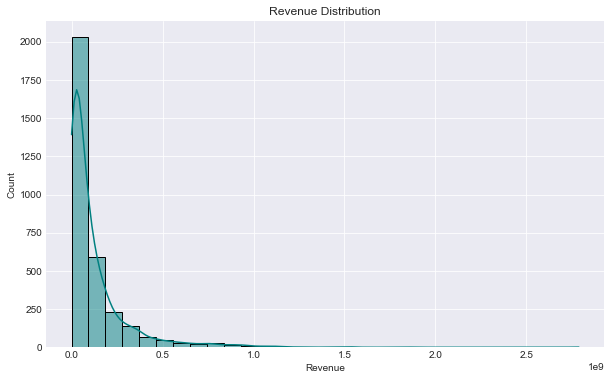

In [123]:
# Instatiate the class.
eda = MovieEDA(clean_df)

# Plot revenue distribution.
eda.revenue_distribution()

The revenue columns has an exponential distribution, with most of the values being 0, the placeolder. The distribution also has a lond tail, hinting that there may be outliers.

### Revenue vs Budget
This code seeks to see how films performed financially against their production budgets and to uncover if the production budget has any influence on the films financial success.

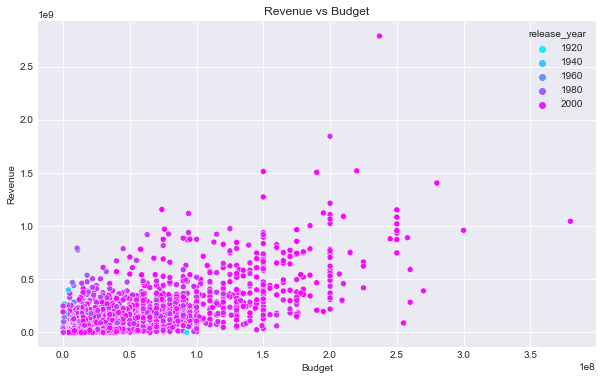

In [124]:
# Plot revenue vs budget
eda.revenue_vs_budget()

In the plot above the first thing we notice is that we have outliers, and the two features do not have the same scales. We also notice that the dots are clustered at the bottom of the plot, this may be indication that high production budgets may not necessarily mean higher financial success, albeit we have some films that have performed well despite their low budgets.

### Average ROI by Genre
Here we are trying to figure out if there is any pattern between returns on investment and movie genres. This is crucial as it will help us understand if the movie genre has any influence on the revenue.

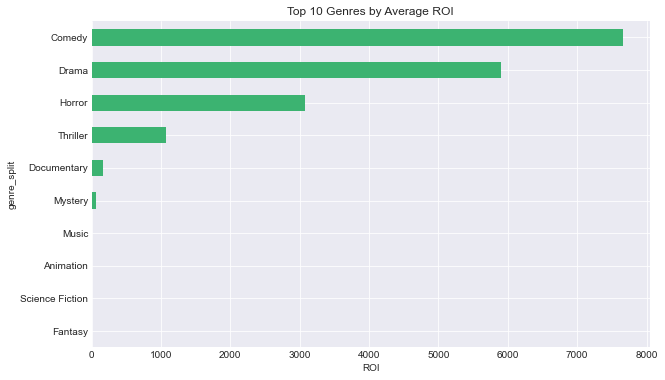

In [125]:
eda.avg_roi_by_genre()

According to the plot above, there is a strong relationship between comedy films and ROIs, followed closely by drama, horror and thriller. 

### Top Directors by ROI.
Directors play a very crucial role in film development, this plot seeks to find directors with the highest average ROI.

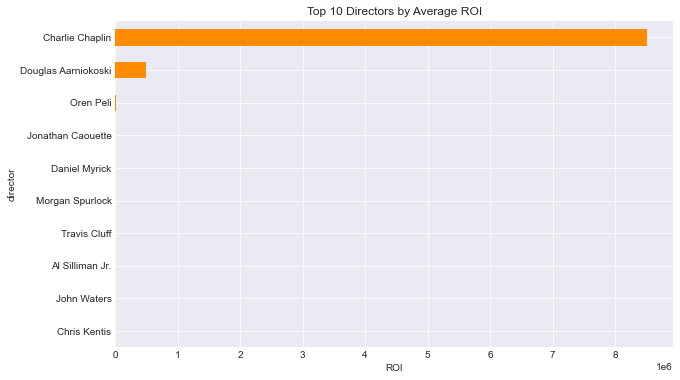

In [126]:
# Plot top directors by average ROI.
eda.top_directors()

Charlie Chaplin is the director with the highest ROI average at around 8.5 million dollars, Douglas Aarniokoski follows behind at around 0.5 million dollars in ROI.

### Vote_score vs Revenue
Here we are trying to understand the relationship between vote_score and revenue, does vote_score influence the films financial success?

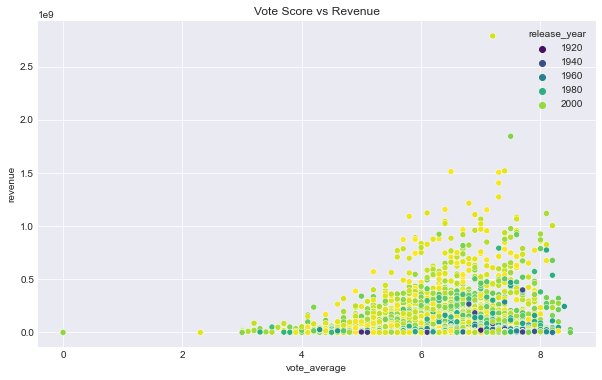

In [127]:
# Plot vote_score vs revenue.
eda.vote_score_vs_revenue()

There are a lot of films with average votes between 4 and 8, and they performed moderately. However, their financial performance may have been underplayed by the outliers present in the dataset causing thme to seem moderate.

### Average Revenue and Budget Over Years
In this section we'll be checking the distribution of production budgets and revenues over the years.

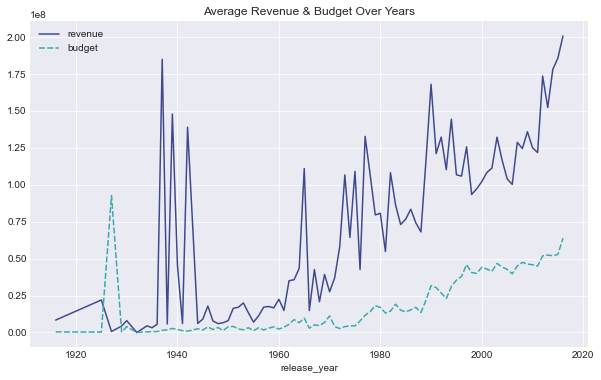

In [128]:
# Plot release trend.
eda.release_trend()

In some of the seasons between the 1930s and 1950s the films were doing really well despite the low production budgets they were developed on. As the years went on, bith the production budgets
and the revenue have been increasing showing stability and innovation.

### Correlation Matrix and Checking Multicollinearity
Here we will be checking if the features are correlated to each other. 

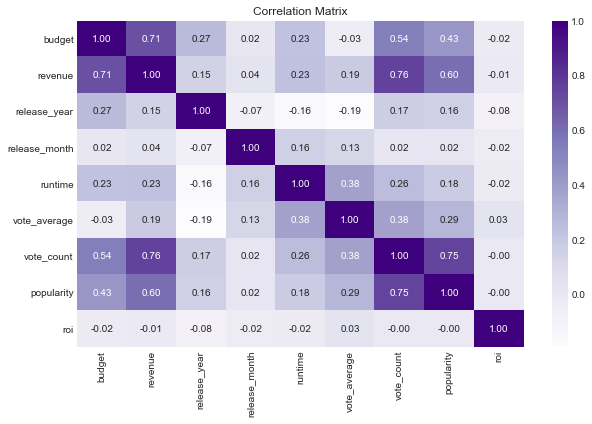

In [129]:
eda.correlation_matrix()

In [130]:
eda.multicollinearity()

,Feature 1,Feature 2,Correlation
12,revenue,vote_count,0.756144


In the last two codes, revenue and vote_count have the highest correlation, but since we are actually predicting the revenue, there is no need to drop either one of them. The other features that are correlated, are just moderate and they pose no threat to the stability of our model.

## **Data Preprocessing**
In this section we will be preprocessiong our data for training and testing purposes. This process will involve:

- Features selection

- train/test splitting.

This part is crucial as it ensures the data is in a suitable format for training and evaluation.

### Feature Selection
First we are going to slice the data to only have the columns relevant for our analysis. We will be using the following columns;

- **vote_count, vote_average, popularity** - These columns reflect audience enjoyment and popularity of the movie.

- **budget** - this is the amount used in developing the movie 

- **runtime** - gives clues about genre tendencies

- **genre** - to explore how genres affect financial success

- **release_month** - to explore if seasons films are released in have any effect on its financial success.

These columns have also been chosen because they are numerical or are categorical and can be encoded.

In [131]:
# Select the features I want.
features = [
    'budget', 'runtime', 'vote_average', 'vote_count',
    'popularity', 'release_month',
    'genres']

# Store them in X, y variables.
X = clean_df[features]
y = clean_df['revenue']

### Train/Test Split.
This is an essential step for our model as the test dataset will help us calsulate how accurate the model is.

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

## **Predictions**
Here we will be using scikit-learn's linear model to perform linear regression on the dataset.

### Training the Model
This will involve modeling and remodeling the data to perfectly fit and predict the revenue. We will be using `statsmodel` for our training.

#### Model_1; baseline model using highly correlated feature
In this model, we will use the most correlated feature for our baseline model.

In [133]:
# Check correlation between target and predictors
clean_df.corr()['revenue']

budget           0.705311
revenue          1.000000
release_year     0.147582
release_month    0.036549
runtime          0.233056
vote_average     0.187726
vote_count       0.756144
popularity       0.602123
roi             -0.011803
Name: revenue, dtype: float64

In [134]:
# Preparing the x data for modeling.
X_baseline = X_train['vote_count'].copy()

# Model the data.
model1 = sm.OLS(y_train, sm.add_constant(X_baseline)).fit()

# Evaluate the model
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     3601.
Date:                Sun, 06 Jul 2025   Prob (F-statistic):               0.00
Time:                        03:47:46   Log-Likelihood:                -51516.
No. Observations:                2581   AIC:                         1.030e+05
Df Residuals:                    2579   BIC:                         1.030e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.635e+07    2.7e+06      9.743      0.0

`Model performance`:
- Our baseline model explains about 58% of the variance and is statistically significant.

-  The features are also statistically significant at an alpha of 0.05.

- For every unit change in `vote_count`, the revenue increases by about $94,600.

#### Model 2; all highly correlated features (`budget, populaity`)
In this next session, we will be adding on more highly correlated features to our model. This is so as to improve the model's performance.

In [135]:
# Add more features to out X_train
X_related = X_train[['budget', 'popularity', 'vote_count']].copy()

# Model our second model.
model2 = sm.OLS(y_train, sm.add_constant(X_related)).fit()

# Evaluate the model
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     2144.
Date:                Sun, 06 Jul 2025   Prob (F-statistic):               0.00
Time:                        03:47:46   Log-Likelihood:                -51028.
No. Observations:                2581   AIC:                         1.021e+05
Df Residuals:                    2577   BIC:                         1.021e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.825e+07   2.63e+06     -6.943      0.0

`Model Performance`:
- Compared to our first model, this model performs better as it explains about 72% of the variance.

- All the features are statistically significant.

- All the coefficients are positive, except the `const`.


#### Model 3; Adding `release_month, runtime, vote_average`
At the moment, our model has `budget`, `popularity` and `vote_count` features, but other elements such as release_month, genre, directors, writers and critical reception are stronger drivers of long-term financial performance as well. However, since these features do not have a correlation to our target variable.

In the next section we will be modeling with the features as they are before we decide to do anyting else.

In [136]:
# Preparing data for modeling
X_influence = X_train[['budget', 'popularity', 'vote_count', 'release_month', 'runtime', 'vote_average']].copy()

# Model our third model.
model3 = sm.OLS(y_train, sm.add_constant(X_influence)).fit()

# Evaluate the model
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     1073.
Date:                Sun, 06 Jul 2025   Prob (F-statistic):               0.00
Time:                        03:47:46   Log-Likelihood:                -51027.
No. Observations:                2581   AIC:                         1.021e+05
Df Residuals:                    2574   BIC:                         1.021e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -2.11e+07   1.62e+07     -1.306

`Model performance`:
- Compared to model 2, the model performance has reduced. The previous model explained about 72% of the variance, in the current it explains 71%.

- All the added features are statistically insignificant. Also, the intercept, which previously was statistically significant, is now insignificant.

- Despite being statistically insignificant, 2 out of the 3 newly added features have a positive effect on the target. 

#### Model 4; checking for multicollinearity
The previous model has 3 features that do not contribute significantly to the target, however, we cannot drop them because according to the industry, they have influence to the financial success of the film. Instead, we are going to investigate why they have a high p-value.

The first step is checking if there is multicollinearity, this is because one of the notes on the previous model suggest so.

We will be using variance inflation factor.

In [137]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Checking for multicollinearity.
vif_data = pd.DataFrame()
vif_data["VIF"] = [variance_inflation_factor(X_influence.values, i) for i in range(X_influence.shape[1])]
vif_data["feature"] = X_influence.columns

# View.
vif_data

,VIF,feature
0,2.812504,budget
1,3.587948,popularity
2,3.874876,vote_count
3,5.429040,release_month
4,35.417717,runtime
5,35.140848,vote_average


In the above DataFrame, we spot two features with VIFs greater than 10, signalling that we may have a case of multicollinearity. 

Next we are looking at a heatmap of the data used and identify the correlated features.

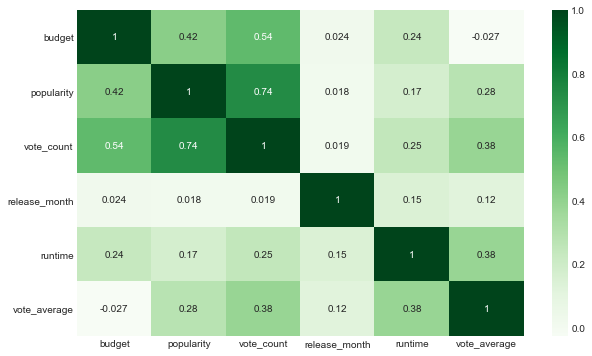

In [138]:
# Plot heatmap.
corr_matrix = X_influence.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Greens');

Despite runtime's and vote_count's VIF being very high, their correlation coefficients are all below 0.38, meaning that we are likely facing multicollinearity caused by indirect linear relationships and not simple pairwise correlation.

To identify what feature is causing the inflation, we are going to create models with the problematic variables as our targets.

`runtime as target`

In [139]:
# Prepare data for modeling
y = X_influence['runtime'].copy()
X_others = X_influence.drop(columns=['runtime']).copy()

# Model
model4_a = sm.OLS(y, sm.add_constant(X_others)).fit()

# Evaluate the model
print(model4_a.summary())

                            OLS Regression Results                            
Dep. Variable:                runtime   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     143.7
Date:                Sun, 06 Jul 2025   Prob (F-statistic):          8.52e-135
Time:                        03:47:48   Log-Likelihood:                -11161.
No. Observations:                2581   AIC:                         2.233e+04
Df Residuals:                    2575   BIC:                         2.237e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            41.0203      3.060     13.407

`vote_average as target`

In [140]:
# Prepare data for modeling
y = X_influence['vote_average'].copy()
X_others = X_influence.drop(columns=['vote_average']).copy()

# Model
model4_b = sm.OLS(y, sm.add_constant(X_others)).fit()

# Evaluate the model
print(model4_b.summary())

                            OLS Regression Results                            
Dep. Variable:           vote_average   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     266.0
Date:                Sun, 06 Jul 2025   Prob (F-statistic):          1.07e-229
Time:                        03:47:48   Log-Likelihood:                -2709.6
No. Observations:                2581   AIC:                             5431.
Df Residuals:                    2575   BIC:                             5466.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.6529      0.077     60.453

While the variable popularity initially appeared to be a useful predictor, further analysis has revealed it to be a source of high multicollinearity, with VIF values exceeding 30 and it is also highly correlated to vote_count at 0.74.

Additionally, its contribution to the two models was statistically insignificant, with consistently high p-values. To improve model stability and interpretability, we are excluding popularity from the next model to observe how it's absence will influence the model.

#### Model 5; dropping popularity
Here we are dropping the popularity predictor to observe if it will have a positive or just any influence on the model.

In [141]:
# Reduce features by dropping popularity.
X_reduced = X_influence.drop(columns= ['popularity']).copy()

# Model
model5 = sm.OLS(y_train, sm.add_constant(X_reduced)).fit()

# Evaluate the model
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     1259.
Date:                Sun, 06 Jul 2025   Prob (F-statistic):               0.00
Time:                        03:47:48   Log-Likelihood:                -51047.
No. Observations:                2581   AIC:                         1.021e+05
Df Residuals:                    2575   BIC:                         1.021e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.695e+07   1.63e+07     -1.042

`Model performance`:
- The model performance has gone down from 71.4% explained variance to 71%, event though the difference is minimal, it is there.

- We still have predictors with high p-values.

#### Model ; encoding release_month and vote_average


In [142]:
X_encoded = X_influence.copy()

# Convert release_month into seasons
def assign_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:
        return 'fall'

X_encoded['release_season'] = X_encoded['release_month'].apply(assign_season)
season_dummies = pd.get_dummies(X_encoded['release_season'], prefix='season', drop_first=True)

# Convert vote_average to sentiment
def vote_sentiment(v):
    if v <= 5.0:
        return 'negative'
    elif v <= 7.0:
        return 'neutral'
    else:
        return 'positive'

X_encoded['vote_sentiment'] = X_encoded['vote_average'].apply(vote_sentiment)
vote_dummies = pd.get_dummies(X_encoded['vote_sentiment'], prefix='vote', drop_first=True)

# Add the dummies
dummies = pd.concat([season_dummies, vote_dummies], axis= 1)
X_encoded = pd.concat([X_encoded, dummies], axis= 1)

# Drop other features to prevent multicollinearity
X_encoded = X_encoded.drop(columns= ['release_month', 'vote_average', 'release_season', 'vote_sentiment'])

# Preview changes
X_encoded.head()

,budget,popularity,vote_count,runtime,season_spring,season_summer,season_winter,vote_neutral,vote_positive
1644,30000000,10.703602,240,130.0,0,0,0,1,0
3258,8000000,9.799177,181,93.0,0,0,1,1,0
372,92000000,27.166757,579,126.0,0,0,0,1,0
2291,19100000,10.559414,208,109.0,0,0,1,1,0
29,200000000,93.004993,7604,143.0,0,0,0,1,0


In [143]:
# Model
encoded_model6 = sm.OLS(y_train, sm.add_constant(X_encoded)).fit()

# Evaluate the model
print(encoded_model6.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     722.6
Date:                Sun, 06 Jul 2025   Prob (F-statistic):               0.00
Time:                        03:47:49   Log-Likelihood:                -51016.
No. Observations:                2581   AIC:                         1.021e+05
Df Residuals:                    2571   BIC:                         1.021e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.718e+07   1.19e+07     -3.129

#### Model 6; standardizing predictors
Dropping the popularity feature has not solved our problem, so we are resolving to standardizing our numerical features to see if it will have a positive influence on our model. 

In [144]:
# Standardize numerical features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_encoded), columns=X_encoded.columns)

# Preview dataframe
X_scaled.head()

,budget,popularity,vote_count,runtime,season_spring,season_summer,season_winter,vote_neutral,vote_positive
0,-0.226307,-0.499630,-0.525038,0.939688,-0.523392,-0.601071,-0.552733,0.605253,-0.495637
1,-0.734106,-0.523922,-0.566936,-0.850477,-0.523392,-0.601071,1.809193,0.605253,-0.495637
2,1.204762,-0.057443,-0.284299,0.746157,-0.523392,-0.601071,-0.552733,0.605253,-0.495637
3,-0.477898,-0.503503,-0.547762,-0.076352,-0.523392,-0.601071,1.809193,0.605253,-0.495637
4,3.697593,1.710916,4.704472,1.568665,-0.523392,-0.601071,-0.552733,0.605253,-0.495637


In [145]:
# Reset y_train index to have match te x_train data 
y_train = y_train.reset_index(drop= True)

# Preview data
y_train.head()

0      31148328
1      16856124
2     143049560
3       5728213
4    1108561013
Name: revenue, dtype: int64

In [146]:
# Model
scaled_model6 = sm.OLS(y_train, sm.add_constant(X_scaled)).fit()

# Evaluate the model
print(scaled_model6.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     722.6
Date:                Sun, 06 Jul 2025   Prob (F-statistic):               0.00
Time:                        03:47:49   Log-Likelihood:                -51016.
No. Observations:                2581   AIC:                         1.021e+05
Df Residuals:                    2571   BIC:                         1.021e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           1.19e+08   1.83e+06     64.953

`Model performance`:
- The model performance is back to 71%, and the target has become statistically significant.

- runtime and vote_average are still insignificant.

- However, standardizing has removed the multicollinearity issue. 

#### Model 8; encoding runtime
Our next option is encoding the runtine predictor. Movie runtimes are either long, short or average, we are going to use this information and create predictors based on the length of the movie.

In [147]:
# Encode runtime
min = X_scaled['runtime'].min()
max = X_scaled['runtime'].max()
X_split = X_scaled.copy()

X_split['runtime'] = pd.to_numeric(X_split['runtime'], errors='coerce')

# Create labels and get dummies
bins = [-float('inf'), -0.5, 0.5, float('inf')]
labels = ['short', 'average', 'long']
X_split['runtime'] = pd.cut(X_split['runtime'], bins=bins, labels=labels)
runtime_dummies = pd.get_dummies(X_split['runtime'], drop_first= True, prefix='runtime')

# Add the dummies to the dataset
X_split = pd.concat([X_split, runtime_dummies], axis=1)

# Preview the changes
X_split.head()

,budget,popularity,vote_count,runtime,season_spring,season_summer,season_winter,vote_neutral,vote_positive,runtime_average,runtime_long
0,-0.226307,-0.499630,-0.525038,long,-0.523392,-0.601071,-0.552733,0.605253,-0.495637,0,1
1,-0.734106,-0.523922,-0.566936,short,-0.523392,-0.601071,1.809193,0.605253,-0.495637,0,0
2,1.204762,-0.057443,-0.284299,long,-0.523392,-0.601071,-0.552733,0.605253,-0.495637,0,1
3,-0.477898,-0.503503,-0.547762,average,-0.523392,-0.601071,1.809193,0.605253,-0.495637,1,0
4,3.697593,1.710916,4.704472,long,-0.523392,-0.601071,-0.552733,0.605253,-0.495637,0,1


In [148]:
# Drop runtime, to avoid multicollinearity
X_split.drop(columns= ['runtime'], inplace= True)

# Model
split_model8 = sm.OLS(y_train, sm.add_constant(X_split)).fit()

# Evaluate the model
print(split_model8.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     656.4
Date:                Sun, 06 Jul 2025   Prob (F-statistic):               0.00
Time:                        03:47:49   Log-Likelihood:                -51007.
No. Observations:                2581   AIC:                         1.020e+05
Df Residuals:                    2570   BIC:                         1.021e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.247e+08   3.15e+06     

`Model performance`:
- Our model perfomance has improved by 0.02, driving our R-squared to about 72% explained variance, a small but significant change.

- release_month is still problematic.

#### Model 9; 

#### Model 10; adding genres
Next, we are adding genre dummies to the model as genres have a huge influence on movies' financial success.

In [149]:
# Create function to get dummies.
def genre_dummies(genres):
    genres['genre_list'] = genres['genres'].str.split(', ')

    # Explode to get one genre per row
    exploded = genres.explode('genre_list')

    # Count frequency
    top_genres = exploded['genre_list'].value_counts().nlargest(5).index.tolist()

    # Create binary flags
    for genre in top_genres:
        genres[f'genre_{genre}'] = genres['genres'].apply(lambda x: 1 if genre in x else 0)

    genres.drop(columns= ['genres', 'genre_list'], inplace= True)

    return genres

# Create genres dataframe
genres = X_train[['genres']]

# Make dummies
dummies = genre_dummies(genres)
dummies = dummies.reset_index(drop= True)

# Preview changes
dummies.head()

<ipython-input-149-287c62186723>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres['genre_list'] = genres['genres'].str.split(', ')
<ipython-input-149-287c62186723>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres[f'genre_{genre}'] = genres['genres'].apply(lambda x: 1 if genre in x else 0)


,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Adventure
0,1,0,1,0,0
1,1,1,0,0,0
2,0,0,1,1,0
3,1,0,1,1,0
4,0,0,1,1,1


In [150]:
# Add dummies to the main dataframe
X_complete = pd.concat([X_split, dummies], axis= 1).copy()

# Drop one genre dummy to prevent issues.
X_complete = X_complete.drop(columns= ['genre_Thriller'])

# Preview changes
X_complete.head()

,budget,popularity,vote_count,season_spring,season_summer,season_winter,vote_neutral,vote_positive,runtime_average,runtime_long,genre_Drama,genre_Comedy,genre_Action,genre_Adventure
0,-0.226307,-0.499630,-0.525038,-0.523392,-0.601071,-0.552733,0.605253,-0.495637,0,1,1,0,0,0
1,-0.734106,-0.523922,-0.566936,-0.523392,-0.601071,1.809193,0.605253,-0.495637,0,0,1,1,0,0
2,1.204762,-0.057443,-0.284299,-0.523392,-0.601071,-0.552733,0.605253,-0.495637,0,1,0,0,1,0
3,-0.477898,-0.503503,-0.547762,-0.523392,-0.601071,1.809193,0.605253,-0.495637,1,0,1,0,1,0
4,3.697593,1.710916,4.704472,-0.523392,-0.601071,-0.552733,0.605253,-0.495637,0,1,0,0,1,1


In [151]:
# Model
model10 = sm.OLS(y_train, sm.add_constant(X_complete)).fit()

# Evaluate the model
print(model10.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     486.6
Date:                Sun, 06 Jul 2025   Prob (F-statistic):               0.00
Time:                        03:47:50   Log-Likelihood:                -50971.
No. Observations:                2581   AIC:                         1.020e+05
Df Residuals:                    2566   BIC:                         1.021e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.215e+08   4.44e+06     

`Model performance`:
- Our model has increased to explain 72% variance, proving to e better than the previous model.

- We have a stable model.

#### Model 11; add interaction term.
To further improve our model performance, we are going to add an interaction term between production budget and genre, thsi will help us identify the influence budget has on genres, and vice versa.

In [152]:
# Copy dataset.
X_final = X_complete.copy()

# Create interaction
X_final['budget_x_genre_Adventure'] = X_final['budget'] * X_final['genre_Adventure']
X_final['positive_vote_x_adventure'] = X_final['vote_positive'] * X_final['genre_Adventure']

# Model
model11 = sm.OLS(y_train, sm.add_constant(X_final)).fit()

# Evaluate the model
print(model11.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     433.2
Date:                Sun, 06 Jul 2025   Prob (F-statistic):               0.00
Time:                        03:47:50   Log-Likelihood:                -50954.
No. Observations:                2581   AIC:                         1.019e+05
Df Residuals:                    2564   BIC:                         1.020e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

`Model performance`:
- Adding an interaction term has improved our model to about 73% explained variance.

- `budget_x_genre_Adventure` = 15.91 million, significant at p < 0.001; meaning that for Adventure movies, the effect of budget on revenue is 15.91 million dollars higher than it is for non-Adventure movies.

### Plotting training model.

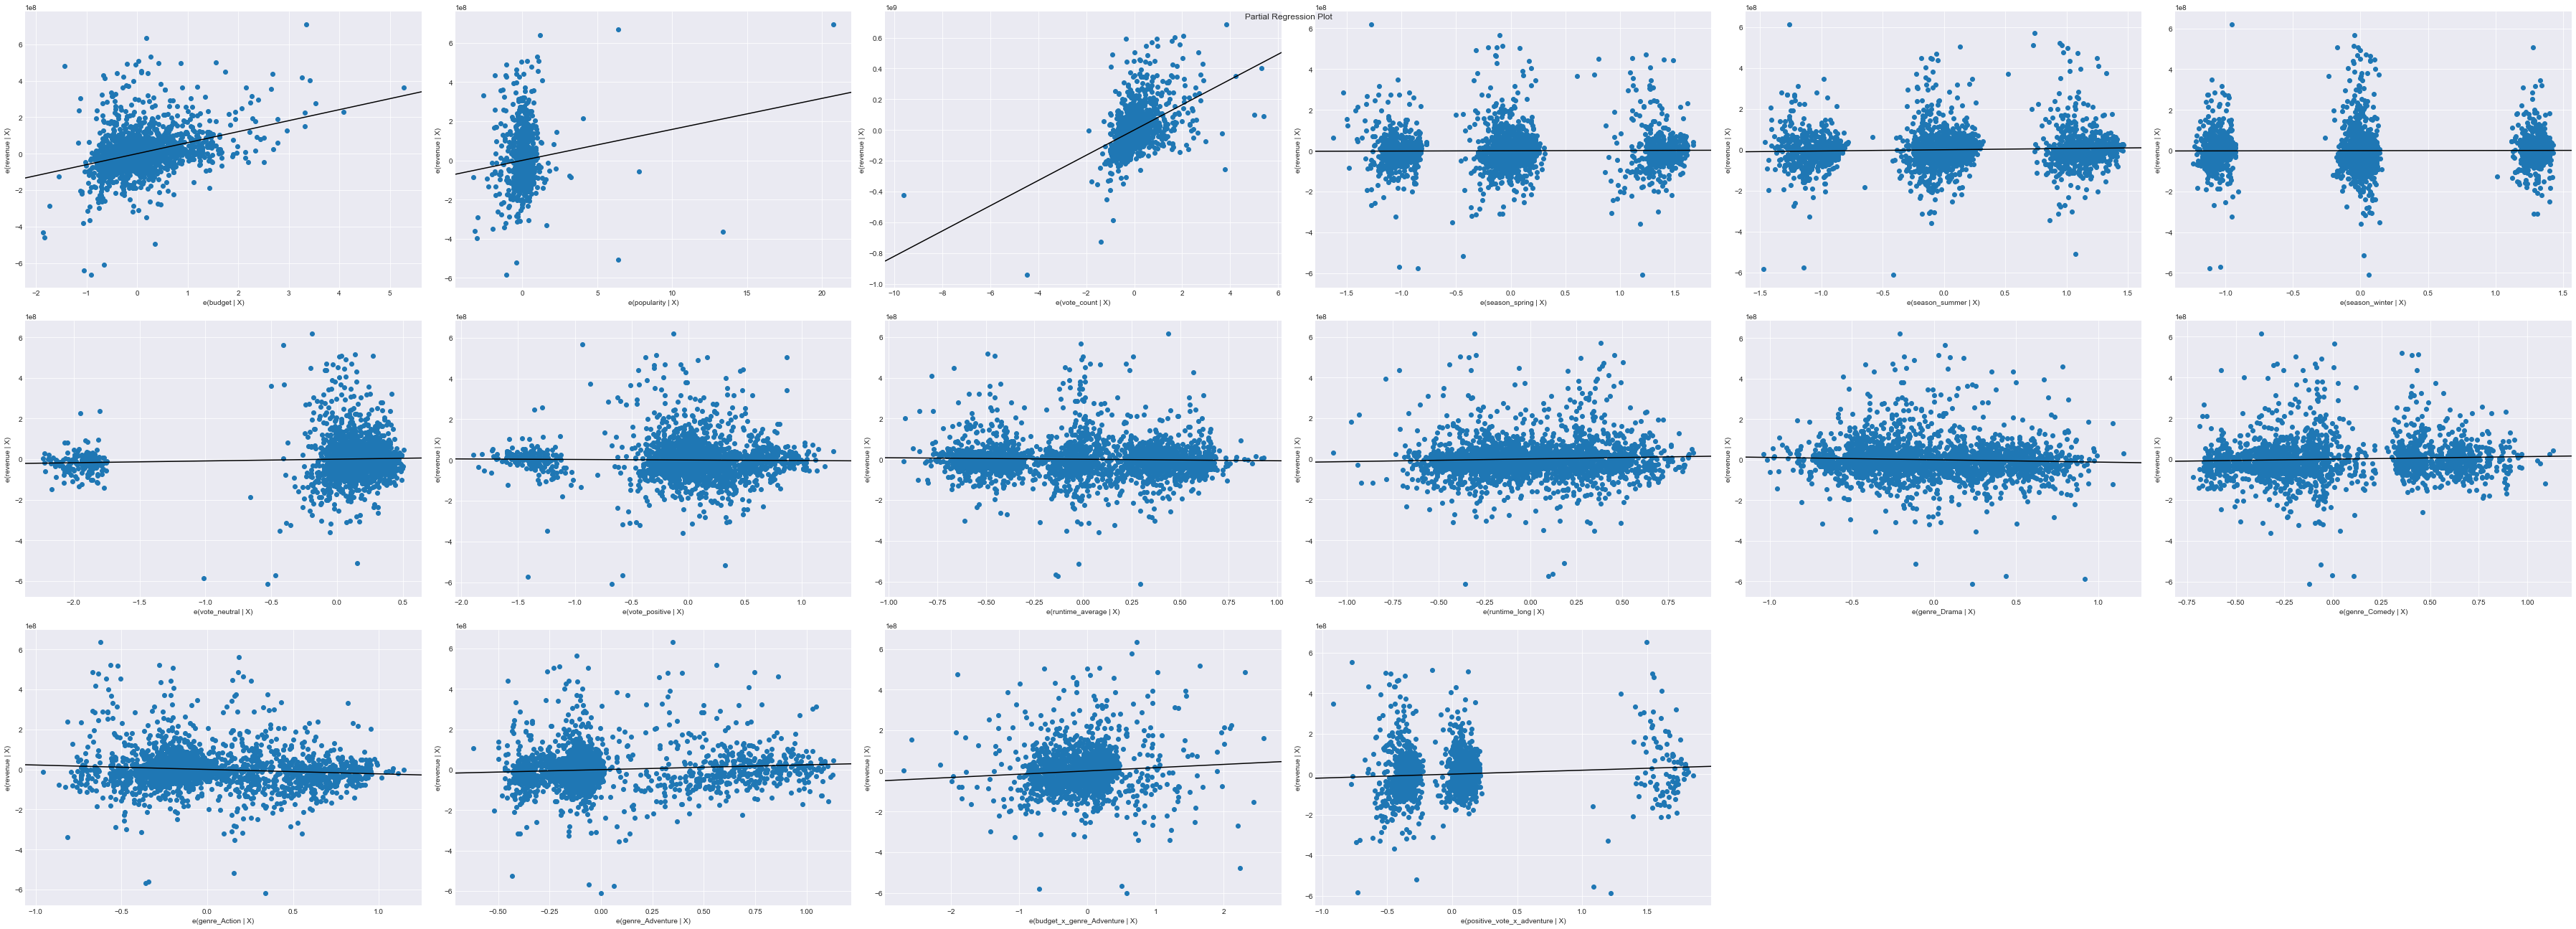

In [153]:
# Plot regression.
fig = plt.figure(figsize= (50,30))
sm.graphics.plot_partregress_grid(results= model11, exog_idx= list(X_final.columns.values), grid= (5,6), fig= fig)
plt.tight_layout()
plt.show()

### Testing the Model
In this section, we are going to test the performance of the model we just trained and see if it is generalized.

#### Test Data Pipeline
Here we are applying all the changes we've applied to the training data to the test data.

In [154]:
X_final.columns

Index(['budget', 'popularity', 'vote_count', 'season_spring', 'season_summer',
       'season_winter', 'vote_neutral', 'vote_positive', 'runtime_average',
       'runtime_long', 'genre_Drama', 'genre_Comedy', 'genre_Action',
       'genre_Adventure', 'budget_x_genre_Adventure',
       'positive_vote_x_adventure'],
      dtype='object')

In [155]:
# mirror training steps
# Copy the dataset
test_df = X_test.copy()
train_df = X_train.copy()

# get dummies for release_month and vote_average in train_df
train_df['release_season'] = train_df['release_month'].apply(assign_season)
season_dummies = pd.get_dummies(train_df['release_season'], prefix='season', drop_first=True)

train_df['vote_sentiment'] = train_df['vote_average'].apply(vote_sentiment)
vote_dummies = pd.get_dummies(train_df['vote_sentiment'], prefix='vote', drop_first=True)

# Add the dummies
dummies = pd.concat([season_dummies, vote_dummies], axis= 1)
train_df = pd.concat([train_df, dummies], axis= 1)

# Drop other features to prevent multicollinearity
train_df = train_df.drop(columns= ['release_month', 'vote_average', 'release_season', 'vote_sentiment'])

# Get release_month and vote_average dummies in test_df
test_df['release_season'] = test_df['release_month'].apply(assign_season)
season_dummies = pd.get_dummies(test_df['release_season'], prefix='season', drop_first=True)

test_df['vote_sentiment'] = test_df['vote_average'].apply(vote_sentiment)
vote_dummies = pd.get_dummies(test_df['vote_sentiment'], prefix='vote', drop_first=True)

# Add dummies
dummies = pd.concat([season_dummies, vote_dummies], axis= 1)
test_df = pd.concat([test_df, dummies], axis= 1)

# Drop other features to prevent multicollinearity
test_df = test_df.drop(columns= ['release_month', 'vote_average', 'release_season', 'vote_sentiment'])


# Standardize numeric columns using the scaler fitted on train data
numeric_cols = ['budget', 'popularity', 'vote_count', 'runtime', 'season_spring', 'season_summer', 'season_winter', 'vote_neutral', 'vote_positive']
scaler = StandardScaler()
scaler.fit(train_df[numeric_cols])  # Fit ONLY on training data
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])

# Bin runtime
test_df['runtime_bin'] = pd.cut(
    test_df['runtime'],
    bins=[-np.inf, -0.5, 0.5, np.inf],
    labels=['short', 'average', 'long']
)

# Get runtime dummies
runtime_dummies = pd.get_dummies(test_df['runtime_bin'], drop_first= True, prefix='runtime')

# Genre dummies, must match train dummies exactly
genre = test_df[['genres']]
get_genre_dummies = genre_dummies(genre)
expected_genres = ['genre_Drama', 'genre_Comedy', 'genre_Action', 'genre_Thriller', 'genre_Adventure']
for col in expected_genres:
    if col not in get_genre_dummies:
        get_genre_dummies[col] = 0
get_genre_dummies = get_genre_dummies[expected_genres]

# Drop genre_Thriller just as training data
get_genre_dummies = get_genre_dummies.drop(columns= ['genre_Thriller'])

# Assemble final test data for prediction
test_model_data = pd.concat([
    test_df[['budget', 'popularity', 'vote_count', 'season_spring', 'season_summer', 'season_winter', 'vote_neutral', 'vote_positive']],
    runtime_dummies,
    get_genre_dummies
], axis=1)


# Add interaction term
test_model_data['budget_x_genre_Adventure'] = test_model_data['budget'] * test_model_data['genre_Adventure']
test_model_data['positive_vote_x_adventure'] = test_model_data['vote_positive'] * test_model_data['genre_Adventure']

# Add constants
test_model_data = sm.add_constant(test_model_data)

# Predict using trained OLS model
predictions = model11.predict(test_model_data)
predictions.head()


<ipython-input-149-287c62186723>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres['genre_list'] = genres['genres'].str.split(', ')
<ipython-input-149-287c62186723>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres[f'genre_{genre}'] = genres['genres'].apply(lambda x: 1 if genre in x else 0)
c:\Users\PC\anaconda33\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documenta

1581    1.361490e+08
351     3.755065e+08
1540    1.492822e+08
400     4.449137e+08
196     3.075933e+08
dtype: float64

#### Model evaluation

In [156]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)
r2_train = model11.rsquared

# Display them
print(f"Model Evaluation Metrics and Comparison:")
print(f"Average revenue: {y_test.mean():,.0f}")
print(f"Median revenue: {y_test.median():,.0f}")
print(f"MAE  (Mean Absolute Error): {mae:,.2f}")
print(f"MSE  (Mean Squared Error): {mse:,.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:,.2f}")
print(f"R²   (R-squared): {r2:.4f}")
print(f"Train_R²   (R-squared): {r2_train:.4f}")

Model Evaluation Metrics and Comparison:
Average revenue: 130,568,283
Median revenue: 56,019,716
MAE  (Mean Absolute Error): 66,656,855.09
MSE  (Mean Squared Error): 17,631,069,956,483,896.00
RMSE (Root Mean Squared Error): 132,782,039.28
R²   (R-squared): 0.6582
Train_R²   (R-squared): 0.7299


In [157]:
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print(f"MAPE: {mape:.2f}%")


MAPE: 387538.90%


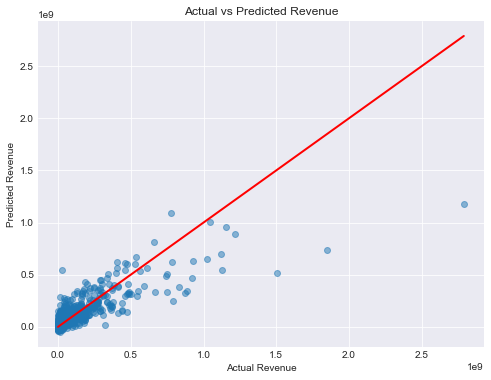

In [158]:
# Plot difference
plt.figure(figsize=(8,6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title("Actual vs Predicted Revenue")
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.grid(True)
plt.show()




#### Model 12; log transforming target variable
Revenue has extreme outliers. You could train your model on log(revenue) instead, which compresses large values and stabilizes variance

In [159]:
# Transform to log
log_y = y_train.copy()
log_y = np.log1p(log_y)

# Model
model12 = sm.OLS(log_y, sm.add_constant(X_final)).fit()

print(model12.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     97.40
Date:                Sun, 06 Jul 2025   Prob (F-statistic):          5.19e-250
Time:                        03:48:02   Log-Likelihood:                -4879.7
No. Observations:                2581   AIC:                             9793.
Df Residuals:                    2564   BIC:                             9893.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

R² dropped because we moved from predicting raw revenue to log-revenue, which shrinks large values (e.g. from $500M to log(500M) ≈ 20.03), making the relationship with features less obvious to a plain Linear Regression model, it also compresses variance. This often leads to lower R² but better model stability and MAE.


#### Test log model

In [160]:
# Add constants
test_model_data = sm.add_constant(test_model_data)

# 6. Predict using trained OLS model
log_predictions = model12.predict(test_model_data)
log_predictions.head()


1581    17.998791
351     19.875181
1540    18.125518
400     19.857114
196     19.942286
dtype: float64

#### Evaluate log predictions

In [161]:
y_test_log = y_test.copy()
y_test_log = np.log1p(y_test_log)

# Calculate metrics
mae = mean_absolute_error(y_test_log, log_predictions)
mse = mean_squared_error(y_test_log, log_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_log, log_predictions)
r2_train = model12.rsquared

model12.rsquared
# Display them
print(f"Model Evaluation Metrics and Comparison:")
print(f"Average revenue: {y_test_log.mean():,.0f}")
print(f"Median revenue: {y_test_log.median():,.0f}")
print(f"MAE  (Mean Absolute Error): {mae:,.2f}")
print(f"MSE  (Mean Squared Error): {mse:,.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:,.2f}")
print(f"R²   (R-squared): {r2:.4f}")
print(f"Train_R²   (R-squared): {r2_train:.4f}")


Model Evaluation Metrics and Comparison:
Average revenue: 17
Median revenue: 18
MAE  (Mean Absolute Error): 1.09
MSE  (Mean Squared Error): 2.98
RMSE (Root Mean Squared Error): 1.73
R²   (R-squared): 0.4085
Train_R²   (R-squared): 0.3780


#### Plot difference between actual values and predicted values

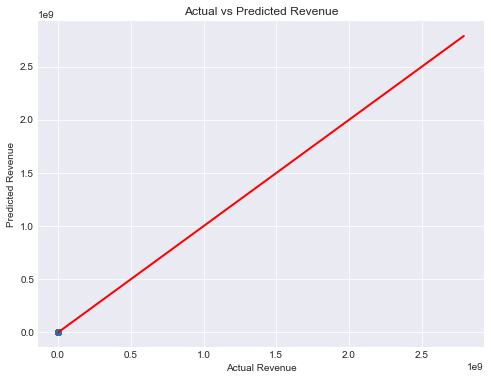

In [162]:
plt.figure(figsize=(8,6))
plt.scatter(y_test_log, log_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title("Actual vs Predicted Revenue")
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.grid(True)
plt.show()

#### Mean Absolute Percentage Error

In [163]:
mape = np.mean(np.abs((y_test_log - log_predictions) / y_test_log)) * 100
print(f"MAPE: {mape:.2f}%")


MAPE: 9.06%


## Final Summary
`📌 Objective`

The goal of this project was to build a robust regression model to predict the revenue of a movie based on attributes such as budget, popularity, runtime, genres, and more. This supports strategic decision-making in the film industry by identifying key factors that drive financial success.

Dataset
We used the TMDB 5000 Movie Dataset, which includes:

- Movie metadata (title, budget, popularity, runtime, etc.)

- Crew and cast information

- Revenue (target variable)

After cleaning and merging, the final dataset included:

- 2,500+ observations

- Dozens of engineered features, including categorical dummies, runtime bins, seasonality, and interaction terms

`🛠️ Modeling Approach`

1. Feature Engineering
Log-transformed revenue to stabilize variance and reduce skew.

Binned runtime into short, average, long categories.

Extracted release_month, later converted to seasonal dummies (Spring, Summer, etc.).

Derived vote sentiment dummies from vote_average (positive, neutral, negative).

Created interaction terms, e.g. budget × genre_Adventure.

2. Preprocessing
Standardized numerical features (e.g., budget, popularity, vote count).

Applied one-hot encoding to categorical features (genre, season, vote sentiment).

Ensured all transformations applied equally to both training and test data.

3. Model Selection and Evaluation
We trained and evaluated multiple models:

- Ordinary Least Squares (OLS) Regression

Ultimately, OLS with log-transformed revenue + engineered features delivered the best balance.

We used train-test-split to ensure our model generalizes well.

`📈 Final Performance (Log-Revenue Model)`

|Metric    |   Training Data |	Test Data  |
|:------   | :-------------: | :---------: |
|R²	       |      0.37	     |0.40         |
|MAE (logₑ)|	1.03	     | 1.09        |
|MAPE	   |       —         |	9.08%      |

Training R²: 0.37
The model explains approximately 36% of the variance in revenue on the training dataset. This is a moderate fit — the model captures some of the key drivers but likely misses more complex or nonlinear effects.

Test R²: 0.40
The model generalizes reasonably well to unseen data, actually improving slightly in explanatory power. This suggests that the model isn’t overfitting and is somewhat stable.

These scores indicate that, on average, the model's revenue predictions are off by a multiplicative factor of about 2.8x in original dollar values — which is not unusual for box office revenue predictions, given their high variability.

💡 The log MAE of 1.09 translates to roughly a 9% average absolute error when predicting revenue in logarithmic terms, meaning we’re typically within 9% of the true revenue in relative terms — a strong result for such a variable domain.

`🔑 Key Insights`

Budget, popularity, and vote count are consistently strong predictors of revenue.

Genres matter: adventure and comedy positively influenced revenue, while thriller and drama had negative associations.

Release seasonality and vote sentiment also contributed meaningfully.

Careful attention to feature consistency between train and test sets dramatically improved model reliability.

`✅ Conclusion`

This project demonstrates how combining domain knowledge, solid feature engineering, and systematic validation can yield a high-performing, interpretable regression model in a complex, real-world industry like film.

The final model achieves:

Good generalization (log_R² = 40%)

Low predictive error (MAE_log ≈ 1.09, MAPE ≈ 9%)


In [165]:
test_data = X_test.copy()
# Assuming you have the test data with original features
import numpy as np

# Reverse the log prediction
test_data['predicted_revenue'] = np.expm1(log_predictions)  # y_pred_log = your model's log prediction
test_data['actual_revenue'] = np.expm1(y_test_log)     # y_test_log = your log-transformed true values

# Optional: residual
test_data['residual'] = test_data['actual_revenue'] - test_data['predicted_revenue']

# Optional: absolute error and percentage error
test_data['abs_error'] = abs(test_data['residual'])
test_data['percent_error'] = 100 * abs(test_data['residual']) / test_data['actual_revenue']

test_data.to_csv('../Data/CleanedData/tableau.csv', sep= ',', index= False)
